Saving country_wise_latest.csv to country_wise_latest (1).csv
Dataset shape: (187, 15)
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week 

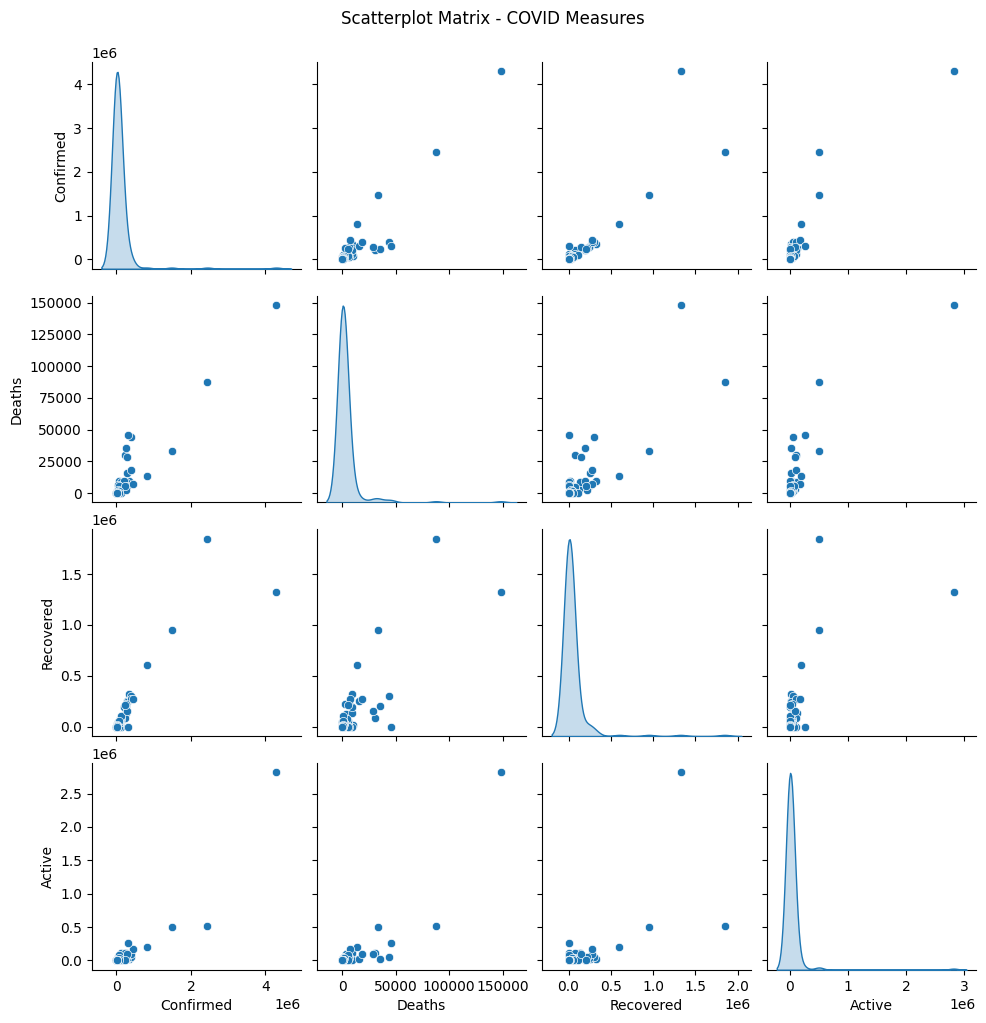

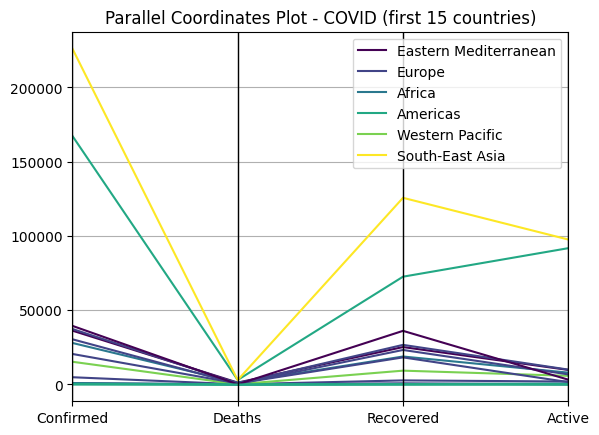

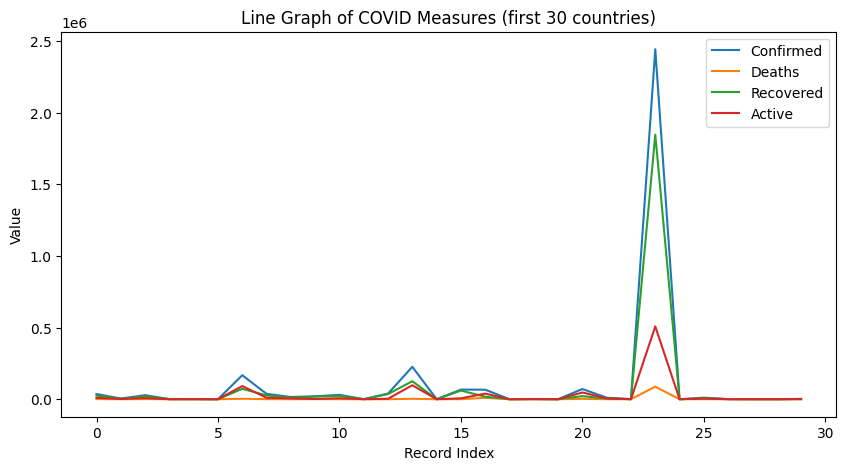

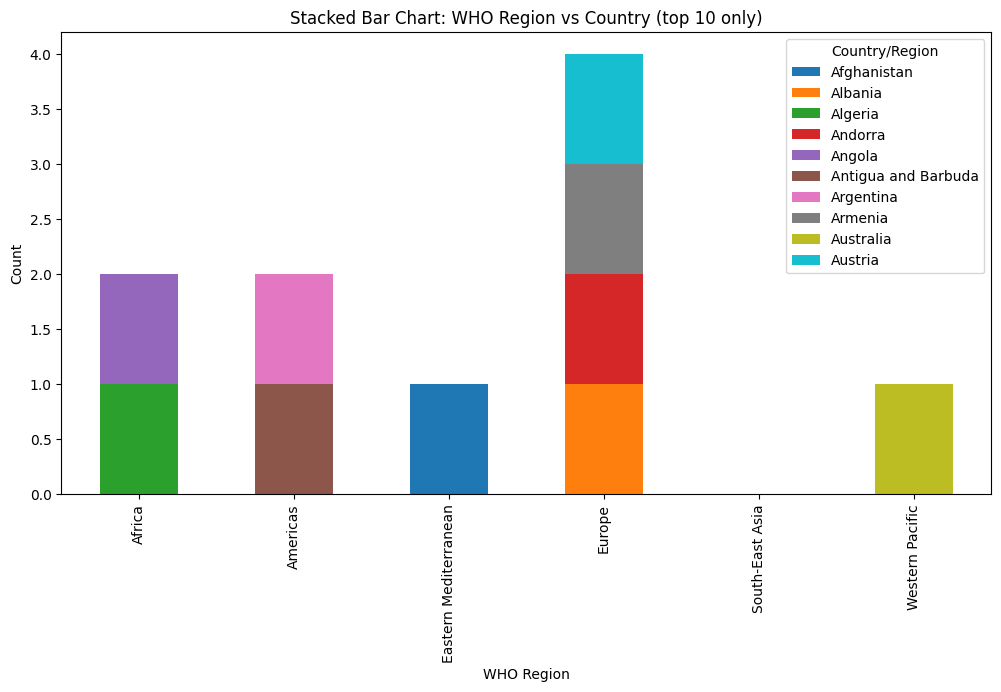

In [ ]:
# Step 0: Upload dataset into Colab
from google.colab import files
uploaded = files.upload()

# Step 1: Load Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

df = pd.read_csv("country_wise_latest.csv")

print("Dataset shape:", df.shape)
print(df.head())

# Step 2: Select useful numeric & categorical columns
num_cols = ["Confirmed", "Deaths", "Recovered", "Active"]
cat_col = "WHO Region"   # better than Country, fewer categories

# Step 3: Scatterplot Matrix (pairwise numeric relationships)
sns.pairplot(df[num_cols], diag_kind="kde")
plt.suptitle("Scatterplot Matrix - COVID Measures", y=1.02)
plt.show()

# Step 4: Parallel Coordinates (limit to first 15 countries for clarity)
subset = df.head(15)[num_cols + [cat_col]]
parallel_coordinates(subset, class_column=cat_col, colormap="viridis")
plt.title("Parallel Coordinates Plot - COVID (first 15 countries)")
plt.show()

# Step 5: Line Graph (trend across index)
df[num_cols].head(30).plot(kind="line", figsize=(10,5))
plt.title("Line Graph of COVID Measures (first 30 countries)")
plt.xlabel("Record Index")
plt.ylabel("Value")
plt.show()

# Step 6: Stacked Bar Chart (WHO Region vs Country count)
stacked_data = pd.crosstab(df["WHO Region"], df["Country/Region"])
stacked_data = stacked_data.iloc[:, :10]  # show only first 10 countries
stacked_data.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Stacked Bar Chart: WHO Region vs Country (top 10 only)")
plt.ylabel("Count")
plt.show()


In [ ]:
# TASK 5.1
# Import libraries
import pandas as pd
import plotly.express as px

# Load dataset (uploaded file)
from google.colab import files
uploaded = files.upload()   # Choose 'country_wise_latest.csv'

# Read dataset
df = pd.read_csv("country_wise_latest.csv")
print(df.head())

# ----- Prepare sample hierarchy for TreeMap & Sunburst -----
# Here I will assume:
# Region  -> WHO Region (if exists)
# Category -> Status of COVID (Active/Recovered/Deaths)
# Subcategory -> Country
# Revenue -> Values (Confirmed cases, Active, Recovered, etc.)

# First melt dataset to long format for categories
df_melted = df.melt(
    id_vars=["Country/Region"],
    value_vars=["Confirmed", "Deaths", "Recovered", "Active"],
    var_name="Category",
    value_name="Count"
)

# Add region column if available (else dummy region)
if "WHO Region" in df.columns:
    df_melted["Region"] = df["WHO Region"].repeat(4).values
else:
    df_melted["Region"] = "Global"

# TreeMap
fig_tree_map = px.treemap(
    df_melted,
    path=["Region", "Category", "Country/Region"],
    values="Count",
    title="TreeMap Chart: COVID Data by Region, Category, and Country"
)
fig_tree_map.show()

# Sunburst
fig_sunburst = px.sunburst(
    df_melted,
    path=["Region", "Category", "Country/Region"],
    values="Count",
    title="Sunburst Chart: COVID Data by Region, Category, and Country"
)
fig_sunburst.show()


Saving country_wise_latest.csv to country_wise_latest.csv
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0          

In [ ]:
# --- TASK 5.b (Few Important Countries Only) ---
import pandas as pd
import plotly.graph_objects as go
from google.colab import files

# Upload dataset
uploaded = files.upload()   # Choose "country_wise_latest.csv"
df = pd.read_csv("country_wise_latest.csv")

# Keep only a few important countries
selected_countries = ["India", "United States of America", "Brazil",
                      "Russia", "United Kingdom"]

df = df[df["Country/Region"].isin(selected_countries)]

# Convert to long format
df_melted = df.melt(
    id_vars=["Country/Region", "WHO Region"],
    value_vars=["Confirmed", "Deaths", "Recovered", "Active"],
    var_name="Category",
    value_name="Count"
)

# Top 5 countries (but since we already filter few, it will just take them)
top_countries = df_melted.groupby(['WHO Region', 'Category']).apply(
    lambda x: x.nlargest(5, 'Count')
).reset_index(drop=True)

# Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=top_countries['WHO Region'] + " - " +
           top_countries['Category'] + ": " +
           top_countries['Country/Region'],
    parents=[""] * len(top_countries),
    values=top_countries['Count']
))
fig.update_layout(title="Top Countries (Few Selected) by Region & Category")
fig.show()


Saving country_wise_latest.csv to country_wise_latest (3).csv


/tmp/ipython-input-836727332.py:25: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

